<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli. Adapted for CS/MATH 3414 by Arash Sarshar. Shared under the same licenses.</td>
 <td> </td>
</table>

In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Numerical Differentiation

**GOAL:**  Given a set of $N+1$ function evaluations $(x_i, y_i)$ approximate the derivatives of the function to a specified accuracy.


**Approach 1:** Find the interpolating polynomial $P_N(x)$ and differentiate that.

### Newton Polynomials

While the interpolating polynomial $P_N(x)$ through $N+1$ distinct points is unique,  it can be expressed in terms of many bases.

However, for our purposes here it's somewhat more convenient to use the *Newton Polynomial* Basis

\begin{align}
    n_0 &= 1\\
    n_j(x) &= \prod^{j-1}_{i=0} (x - x_i)\quad\mathrm{for}\quad j>0 \\
\end{align}


### Newton Polynomials

Unrolling them, we see
\begin{align}
    n_0(x) &= 1\\
    n_1(x) &= (x-x_0) \\
    n_2(x) &= (x - x_0)(x-x_1)\\
        &\vdots \\
    n_N(x) &= (x - x_0)(x - x_1)\cdots(x-x_{N-1})\\
\end{align}

Note:  The Newton polynomials have some features common to both the monomials and the Lagrange polynomials

* Like the monomials they are monic polynomials of increasing degree in $x$, i.e. $n_2(x)$ is quadratic
* Like the Lagrange polynomials, some Newton polynomials vanish identically at the interpolation points $x_i$.  In particular

$$
    n_j(x_i) = 0 \quad \mathrm{for}\quad j> i
$$

### Newton's Form

This last feature makes it convenient to solve for the interpolating polynomial.

$$P_N(x) = \sum^N_{j=0} a_j n_j(x)$$

as the $(N+1)\times (N+1)$ linear system

$$
    P_N(x_i) = y_i\quad\mathrm{for}\quad i=0,\ldots,N
$$

#### Becomes the lower triangular system

$$
\begin{bmatrix}
1 & 0 & 0 & \ldots & 0 \\
1 & (x_1-x_0) & 0 & \ldots & 0 \\
1 & (x_2-x_0) & (x_2-x_0)(x_2-x_1) & \ldots & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots  \\
1 & n_1(x_n) & n_2(x_n) & \ldots & n_n(x_n) \\
\end{bmatrix}\begin{bmatrix}
a_0 \\
a_1 \\
a_2 \\
\vdots \\
a_n \\
\end{bmatrix}=
\begin{bmatrix}
y_0 \\
y_1 \\
y_2 \\
\vdots \\
y_n \\
\end{bmatrix}
$$

Which can be solved sequentially starting with

\begin{align}
    a_0 & = y_0\\
    a_1 & = \frac{y_1 - y_0}{x_1 - x_0} \\
    a_2 & = \frac{y_2 - y_0 - a_1(x_2 - x_0)}{(x_2-x_0)(x_2-x_1)} \\
    &\vdots \\
\end{align}

### The divided differences

The $a_j = [y_0, \ldots, y_j]$ are also known as *the divided differences* which are defined recursively as

$$[y_i] = y_i \quad i \in \{0,\ldots, N+1\}$$

and

$$[y_i, \ldots , y_{i+j}] = \frac{[y_{i+1}, \ldots , y_{i + j}] - [y_{i},\ldots,y_{i+j-1}]}{x_{i+j} - x_{i}} \quad i \in \{0,\ldots,N+1 - j\} \quad j \in \{1,\ldots, N+1\}$$

These formulas are recursively defined but not so helpful, here are a few examples to start out with:

$$[y_0] = y_0$$

$$[y_0, y_1] = \frac{y_1 - y_0}{x_1 - x_0}$$

$$[y_0, y_1, y_2] = \frac{[y_1, y_2] - [y_0, y_1]}{x_{2} - x_{0}} = \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0} = \frac{y_2 - y_1}{(x_2 - x_1)(x_2 - x_0)} - \frac{y_1 - y_0}{(x_1 - x_0)(x_2 - x_0)}$$

The benefit of writing a polynomial like this is that it isolates the $x$ dependence (we can easily take derivatives of this form).

In general then $P_N(x)$ can be written in Newton's form as

$$P_N(x) = y_0 + (x-x_0)[y_0, y_1] + (x - x_0) (x - x_1) [y_0, y_1, y_2] + \cdots + (x-x_0) (x-x_1) \cdots (x-x_{N-1}) [y_0, y_1, \ldots, y_{N}]$$

As another concrete example consider the general quadratic polynomial written in Newton's form

$$P_2(x) = [y_0] + (x - x_0) [y_0, y_1] + (x - x_0)(x - x_1) [y_0, y_1, y_2] \\= y_0 + (x - x_0) \frac{y_1 - y_0}{x_1 - x_0} + (x - x_0)(x - x_1) \left ( \frac{y_2 - y_1}{(x_2 - x_1)(x_2 - x_0)} - \frac{y_1 - y_0}{(x_1 - x_0)(x_2 - x_0)} \right )$$

Recall that the interpolating polynomial of degree $N$ through these points is unique!

### Error Analysis

Given $N + 1$ points we can form an interpolant $P_N(x)$ of degree $N$ where

$$f(x) = P_N(x) + R_N(x)$$

And we know from Lagrange's Theorem that the remainder term looks like

$$R_N(x) = (x - x_0)(x - x_1)\cdots (x - x_{N})(x - x_{N+1}) \frac{f^{(N+1)}(c)}{(N+1)!}$$

noting that we need to require that $f(x) \in C^{N+1}$ on the interval of interest.  Taking the derivative of the interpolant $P_N(x)$ then leads to 

$$P_N'(x) = [y_0, y_1] + ((x - x_1) + (x - x_0)) [y_0, y_1, y_2] + \cdots + \left(\sum^{N-1}_{i=0}\left( \prod^{N-1}_{j=0,~j\neq i} (x - x_j) \right )\right ) [y_0, y_1, \ldots, y_N]$$

Similarly we can find the derivative of the remainder term $R_N(x)$ as

$$R_N'(x) = \left(\sum^{N}_{i=0} \left( \prod^{N}_{j=0,~j\neq i} (x - x_j) \right )\right ) \frac{f^{(N+1)}(c)}{(N+1)!}$$

Now if we consider the approximation of the derivative evaluated at one of our data points $(x_k, y_k)$ these expressions simplify such that

$$f'(x_k) = P_N'(x_k) + R_N'(x_k)$$

If we let $\Delta x = \max_i |x_k - x_i|$ we then know that the remainder term will be $\mathcal{O}(\Delta x^N)$ as $\Delta x \rightarrow 0$ thus showing that this approach converges and we can find arbitrarily high order approximations (ignoring floating point error).

Note these approximations should be familiar to use as the limit as $\Delta x \rightarrow 0$ these are no longer approximations but equivalent definitions of the derivative at $x_n$.

In [ ]:
f = lambda x: numpy.sin(x)
f_prime = lambda x: numpy.cos(x)

# Use uniform discretization
x = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, 1000)
N = 20
x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
delta_x = x_hat[1] - x_hat[0]

# Compute forward difference using a loop
f_prime_hat = numpy.empty(x_hat.shape)
for i in range(N - 1):
    f_prime_hat[i] = (f(x_hat[i+1]) - f(x_hat[i])) / delta_x
f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x

# Vector based calculation
# f_prime_hat[:-1] = (f(x_hat[1:]) - f(x_hat[:-1])) / (delta_x)

# Use first-order differences for points at edge of domain
f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x  # Backward Difference at x_N

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, f_prime(x), 'k')
axes.plot(x_hat + 0.5 * delta_x, f_prime_hat, 'ro')
axes.set_xlim((x[0], x[-1]))
axes.set_ylim((-1.1, 1.1))
axes.grid()

plt.show()

#### Aside:  Computing Order of Convergence

Say we had the error $E(\Delta x)$ and we wanted to make a statement about the rate of convergence (note we can replace $E$ here with the $R$ from above).  Then we can do the following:
$$\begin{aligned}
    E(\Delta x) &= C \Delta x^n \\
    \log E(\Delta x) &= \log C + n \log \Delta x
\end{aligned}$$

The slope of the line is $n$ when modeling the error like this!  We can also match the first point by solving for $C$:

$$
    C = e^{\log E(\Delta x) - n \log \Delta x}
$$

In [ ]:
f = lambda x: numpy.sin(x)
f_prime = lambda x: numpy.cos(x)

# Compute the error as a function of delta_x
N_range = numpy.logspace(1, 4, 10, dtype=int)
delta_x = numpy.empty(N_range.shape)
error = numpy.empty((N_range.shape[0], 4))
for (i, N) in enumerate(N_range):
    x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
    delta_x[i] = x_hat[1] - x_hat[0]

    # Compute forward difference
    f_prime_hat = numpy.empty(x_hat.shape)
    f_prime_hat[:-1] = (f(x_hat[1:]) - f(x_hat[:-1])) / (delta_x[i])

    # Use first-order differences for points at edge of domain
    f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x[i]  # Backward Difference at x_N
    
    # The differences in error computations is interesting here.  Note that the L_\infty norm returns a single
    # point-wise like error where as the L_2 and L_1 are adding error up so they exhbit less convergence
    error[i, 0] = numpy.linalg.norm(numpy.abs(f_prime(x_hat) - f_prime_hat), ord=numpy.infty)
    error[i, 1] = numpy.linalg.norm(numpy.abs(f_prime(x_hat + 0.5 * delta_x[i]) - f_prime_hat), ord=numpy.infty)
    error[i, 2] = numpy.linalg.norm(numpy.abs(f_prime(x_hat) - f_prime_hat), ord=1)
    error[i, 3] = numpy.linalg.norm(numpy.abs(f_prime(x_hat) - f_prime_hat), ord=2)
    
error = numpy.array(error)
delta_x = numpy.array(delta_x)
    
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)
fig.set_figheight(fig.get_figheight() * 2)
# plt.rc('legend', fontsize=6)
# plt.rc('font', size=6)

error_type = ['$L^\infty$', 'offset $L^\infty$', '$L^1$', '$L^2$']
for i in range(error.shape[1]):
    axes = fig.add_subplot(2, 2, i + 1)
    axes.loglog(delta_x, error[:, i], 'ko', label="Error")

    order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
    axes.loglog(delta_x, order_C(delta_x[0], error[0, i], 1.0) * delta_x**1.0, 'r--', label="1st Order")
    axes.loglog(delta_x, order_C(delta_x[0], error[0, i], 2.0) * delta_x**2.0, 'b--', label="2nd Order")
    axes.legend(loc=4)
    axes.set_title("Convergence of 1st Order Differences - %s" % error_type[i])
    axes.set_xlabel("$\Delta x$")
    axes.set_ylabel("$|f'(x) - \hat{f}'(x)|$")

plt.show()

### Example 2: 2nd Order Centered Difference

Now lets use 3 points to calculate the 2nd order accurate finite-difference.  Consider the points $(x_{n}, y_{n})$, $(x_{n-1}, y_{n-1})$, and $(x_{n+1}, y_{n+1})$, from before we have

$$\begin{aligned}
    P_2(x) &= [f(x_0)] + (x - x_0) [f(x_0), f(x_1)] + (x - x_0)(x - x_1) [f(x_0), f(x_1), f(x_2)] \\
    &= f(x_0) + (x - x_0) \frac{f(x_1) - f(x_0)}{x_1 - x_0} + (x - x_0)(x - x_1) \left ( \frac{f(x_2) - f(x_1)}{(x_2 - x_1)(x_2 - x_0)} - \frac{f(x_1) - f(x_0)}{(x_1 - x_0)(x_2 - x_0)} \right )
\end{aligned}$$
Compute the formula for the derivative.  Assume that the distance between the $x_i$ are equal.

$$\begin{aligned}
    P_2'(x) &= [f(x_n), f(x_{n+1})] + ((x - x_n) + (x - x_{n+1})) [f(x_n), f(x_{n+1}), f(x_{n-1})] \\
    &= \frac{f(x_{n+1}) - f(x_n)}{x_{n+1} - x_n}  + ((x - x_n) + (x - x_{n+1}))\\ &* \left ( \frac{f(x_{n-1}) - f(x_{n+1})}{(x_{n-1} - x_{n+1})(x_{n-1} - x_n)} - \frac{f(x_{n+1}) - f(x_n)}{(x_{n+1} - x_n)(x_{n-1} - x_n)} \right )
\end{aligned}$$

Evaluating at $x_n$ and assuming the points $x_{n-1}, x_n, x_{n+1}$ are evenly spaced leads to

$$\begin{aligned}
    P_2'(x_n) &= \frac{f(x_{n+1}) - f(x_n)}{\Delta x} - \Delta x \left ( \frac{f(x_{n-1}) - f(x_{n+1})}{2\Delta x^2} + \frac{f(x_{n+1}) - f(x_n)}{\Delta x^2} \right ) \\
    &=\frac{f(x_{n+1}) - f(x_n)}{\Delta x} - \left ( \frac{f(x_{n+1}) - 2f(x_n) + f(x_{n-1})}{2\Delta x}\right ) \\
    &=\frac{2f(x_{n+1}) - 2f(x_n) - f(x_{n+1}) + 2f(x_n) - f(x_{n-1})}{2 \Delta x} \\
    &=\frac{f(x_{n+1}) - f(x_{n-1})}{2 \Delta x}
\end{aligned}$$

This finite-difference is second order accurate and is centered about the point it is meant to approximate ($x_n$).  We can show that it is second order by again considering the remainder term's derivative

$$\begin{aligned}
    R_2'(x) &= \left(\sum^{2}_{i=0} \left( \prod^{2}_{j=0,~j\neq i} (x - x_j) \right )\right ) \frac{f'''(c)}{3!} \\
    &= \left ( (x - x_{n+1}) (x - x_{n-1}) + (x-x_n) (x-x_{n-1}) + (x-x_n)(x-x_{n+1}) \right ) \frac{f'''(c)}{3!}
\end{aligned}$$

Again evaluating this expression at $x = x_n$ and assuming evenly space points we have

$$R_2'(x_n) = -\Delta x^2 \frac{f'''(c)}{3!}$$

showing that our error is $\mathcal{O}(\Delta x^2)$.

In [ ]:
f = lambda x: numpy.sin(x)
f_prime = lambda x: numpy.cos(x)

# Use uniform discretization
x = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, 1000)
N = 21
x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
delta_x = x_hat[1] - x_hat[0]

# Compute derivative
f_prime_hat = numpy.empty(x_hat.shape)
f_prime_hat[1:-1] = (f(x_hat[2:]) - f(x_hat[:-2])) / (2. * delta_x)

# Use first-order differences for points at edge of domain
f_prime_hat[0] = (f(x_hat[1]) - f(x_hat[0])) / delta_x     # Forward Difference at x_0
f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x  # Backward Difference at x_N
#f_prime_hat[0] = (-3.0 * f(x_hat[0]) + 4.0 * f(x_hat[1]) - f(x_hat[2])) / (2.0 * delta_x)
#f_prime_hat[-1] = (3.0 * f(x_hat[-1]) - 4.0 * f(x_hat[-2]) + f(x_hat[-3])) / (2.0 * delta_x)

In [ ]:
fig = plt.figure()
plt.rcdefaults()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, f_prime(x), 'k',label="$f'(x)$")
axes.plot(x_hat, f_prime_hat, 'ro')
axes.plot(x, f(x),'g--',label="$f(x)$")
axes.plot(x_hat, f(x_hat), 'go')
axes.set_xlim((x[0], x[-1]))
# axes.set_ylim((-1.1, 1.1))
axes.grid()
axes.legend()

plt.show()

In [ ]:
# Compute the error as a function of delta_x
delta_x = []
error = []
# for N in range(2, 101):
for N in range(50, 1000, 50):
    x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N + 1)
    delta_x.append(x_hat[1] - x_hat[0])

    # Compute derivative
    f_prime_hat = numpy.empty(x_hat.shape)
    f_prime_hat[1:-1] = (f(x_hat[2:]) - f(x_hat[:-2])) / (2 * delta_x[-1])

    # Use first-order differences for points at edge of domain
    f_prime_hat[0] = (f(x_hat[1]) - f(x_hat[0])) / delta_x[-1]  
    f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x[-1]
    # Use second-order differences for points at edge of domain
    f_prime_hat[0] =  (-3.0 * f(x_hat[0])  +  4.0 * f(x_hat[1])  + - f(x_hat[2]))  / (2.0 * delta_x[-1])
    f_prime_hat[-1] = ( 3.0 * f(x_hat[-1]) + -4.0 * f(x_hat[-2]) +   f(x_hat[-3])) / (2.0 * delta_x[-1])
    
    # Compute Error
    error.append(numpy.linalg.norm(numpy.abs(f_prime(x_hat) - f_prime_hat), ord=numpy.infty))
#     error.append(numpy.linalg.norm(numpy.abs(f_prime(x_hat) - f_prime_hat), ord=2))
    
error = numpy.array(error)
delta_x = numpy.array(delta_x)
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.loglog(delta_x, error, "ro", label="Approx. Derivative")

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, order_C(delta_x[0], error[0], 1.0) * delta_x**1.0, 'b--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[0], error[0], 2.0) * delta_x**2.0, 'r--', label="2nd Order")
axes.legend(loc=4)
axes.set_title("Convergence of 2nd Order Differences")
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$|f'(x) - \hat{f}'(x)|$")
axes.grid()

plt.show()

## Finite difference formulas


**Approach 2:** Use Taylor expansions of functions evaluations to find the desored derivative



An alternative method for finding finite-difference formulas is by using Taylor series expansions about the point we want to approximate.  The Taylor series about $x_n$ is

$$f(x) = f(x_n) + (x - x_n) f'(x_n) + \frac{(x - x_n)^2}{2!} f''(x_n) + \frac{(x - x_n)^3}{3!} f'''(x_n) + \mathcal{O}((x - x_n)^4)$$

Let's assume we have function values at  
$$x_{n-1}, f(x_{n-1}), \quad  x_n, f(x_n), \quad  x_{n+1}, f(x_{n+1}) $$

We write the Taylor series approximation of $f(x_{n+1})$ as

\begin{aligned}
    f(x_{n+1}) &= f(x_n) + (x_{n+1} - x_n) f'(x_n) + \frac{(x_{n+1} - x_n)^2}{2!} f''(x_n) + \frac{(x_{n+1} - x_n)^3}{3!} f'''(x_n) + \mathcal{O}((x_{n+1} - x_n)^4) \\
    &= f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)
\end{aligned}

$$
f'(x_n)  = \frac{f(x_{n+1}) - f(x_n)}{\Delta x} + \mathcal{O}(\Delta x)
$$

Can we do better?

\begin{align}
f(x_{n-1}) &= f(x_n) + (x_{n-1} - x_n) f'(x_n) + \frac{(x_{n-1} - x_n)^2}{2!} f''(x_n) + \frac{(x_{n-1} - x_n)^3}{3!} f'''(x_n) + \mathcal{O}((x_{n-1} - x_n)^4)\\
&= f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)
\end{align}

Or all together (for regularly spaced points),
\begin{align} 
f(x_{n+1}) &= f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)\\
f(x_{n-1})&= f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)
\end{align}

Now to find out how to combine these into an expression for the derivative we assume our approximation looks like

$$
    f'(x_n) + R(x_n) = A f(x_{n+1}) + B f(x_n) + C f(x_{n-1})
$$

where $R(x_n)$ is our error.  

Plugging in the Taylor series approximations we find

$$\begin{aligned}
    f'(x_n) + R(x_n) &= A \left ( f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)\right ) \\
    & + B f(x_n) \\ 
    & + C \left ( f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4) \right )
\end{aligned}$$

Since we want $R(x_n) = \mathcal{O}(\Delta x^2)$ we want all terms lower than this to cancel except for those multiplying $f'(x_n)$ as those should sum to 1 to give us our approximation.  Collecting the terms with common evaluations of the derivatives on $f(x_n)$ we get a series of expressions for the coefficients $A$, $B$, and $C$ based on the fact we want an approximation to $f'(x_n)$.  The $n=0$ terms collected are $A + B + C$ and are set to 0 as we want the $f(x_n)$ term to also cancel.

$$\begin{aligned}
    f(x_n):&  &A + B + C &= 0 \\
    f'(x_n): & &A \Delta x - C \Delta x &= 1 \\
    f''(x_n): & &A \frac{\Delta x^2}{2} + C \frac{\Delta x^2}{2} &= 0
\end{aligned} $$

This last equation $\Rightarrow A = -C$, using this in the second equation gives $A = \frac{1}{2 \Delta x}$ and $C = -\frac{1}{2 \Delta x}$.  The first equation then leads to $B = 0$.  Putting this altogether then gives us our previous expression including an estimate for the error:

$$\begin{aligned}
    f'(x_n) + R(x_n) &= \quad \frac{1}{2 \Delta x} \left ( f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)\right ) \\
    & \quad + 0 \cdot f(x_n) \\ 
    & \quad - \frac{1}{2 \Delta x} \left ( f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4) \right ) \\
    &=  f'(x_n) + \frac{1}{2 \Delta x} \left ( \frac{2 \Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)\right )
\end{aligned}$$
so that we find
$$
    R(x_n) = \frac{\Delta x^2}{3!} f'''(x_n) + \mathcal{O}(\Delta x^3) = \mathcal{O}(\Delta x^2)
$$



$$ f'(x_n)   = \frac{f(x_{n+1}) - f(x_{n-1})}{2 \Delta x} + \mathcal{O}(\Delta x^2)$$

We can also derive the "forward" and "backward" formulas by considering the question slightly differently.  Say we want $f'(x_n)$, then the "forward" finite-difference can be written as

$$f'(x_n) \approx D_1^+ = \frac{f(x_{n+1}) - f(x_n)}{\Delta x}$$

and the "backward" finite-difference as

$$f'(x_n) \approx D_1^- = \frac{f(x_n) - f(x_{n-1})}{\Delta x}$$

### Example: Higher Order Derivatives

Using our Taylor series approach lets derive the second order accurate second derivative formula.  Again we will use the same points and the Taylor series centered at $x = x_n$ so we end up with the same expression as before:



$$\begin{aligned}
    f''(x_n) + R(x_n) &= \quad A \left ( f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \frac{\Delta x^4}{4!} f^{(4)}(x_n) + \mathcal{O}(\Delta x^5)\right ) \\
    &+ \quad B \cdot f(x_n) \\
    &+ \quad C \left ( f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \frac{\Delta x^4}{4!} f^{(4)}(x_n) + \mathcal{O}(\Delta x^5) \right )
\end{aligned}$$

except this time we want to leave $f''(x_n)$ on the right hand side.  

Try out the same trick as before and see if you can setup the equations that need to be solved.

Doing the same trick as before we have the following expressions:

$$\begin{aligned}
    f(x_n): & & A + B + C &= 0\\
    f'(x_n): & & A \Delta x - C \Delta x &= 0\\
    f''(x_n): & & A \frac{\Delta x^2}{2} + C \frac{\Delta x^2}{2} &= 1
\end{aligned}$$

The second equation implies $A = C$ which combined with the third implies

$$A = C = \frac{1}{\Delta x^2}$$

Finally the first equation gives

$$B = -\frac{2}{\Delta x^2}$$

leading to the final expression

$$\begin{aligned}
    f''(x_n) + R(x_n) &= \quad \frac{1}{\Delta x^2} \left ( f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \frac{\Delta x^4}{4!} f^{(4)}(x_n) + \mathcal{O}(\Delta x^5)\right ) \\
    &+ \quad -\frac{2}{\Delta x^2} \cdot f(x_n) \\
    &+ \quad \frac{1}{\Delta x^2} \left ( f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \frac{\Delta x^4}{4!} f^{(4)}(x_n) + \mathcal{O}(\Delta x^5) \right ) \\
    &= f''(x_n) + \frac{1}{\Delta x^2} \left(\frac{2 \Delta x^4}{4!} f^{(4)}(x_n) + \mathcal{O}(\Delta x^5) \right )
\end{aligned}
$$
so that

$$
    R(x_n) = \frac{\Delta x^2}{12} f^{(4)}(x_n) + \mathcal{O}(\Delta x^3)
$$

This formula calculates a central finite difference: 

$$ f''(x_n)   = \frac{f(x_{n+1}) - 2 f(x_n) + f(x_{n-1})}{ \Delta x^2} + \mathcal{O}(\Delta x^2)$$

Let's derive a one sided formula, assume you have $f(x_n), f(x_{n-1}), f(x_{n-2})$

$$\begin{aligned}
    f''(x_n) + R(x_n) &= \quad A \left ( f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \frac{\Delta x^4}{4!} f^{(4)}(x_n) + \mathcal{O}(\Delta x^5)\right ) \\
    &+ \quad B \cdot f(x_n) \\
    &+ \quad C \left ( f(x_n) - 2\Delta x f'(x_n) + \frac{4 \Delta x^2}{2!} f''(x_n) - \frac{ 9\Delta x^3}{3!} f'''(x_n) + \frac{16 \Delta x^4}{4!} f^{(4)}(x_n) + \mathcal{O}(\Delta x^5) \right )
\end{aligned}$$


$$\begin{aligned}
    f(x_n): & & A + B + C &= 0\\
    f'(x_n): & & A - 2 C &= 0\\
    f''(x_n): & & A  + 4 C &= 1 \\
\end{aligned}$$

$$     A = \frac{1}{3}, \quad B = -\frac{1}{2},\quad C = \frac{1}{6} $$

In [5]:
f = lambda x: numpy.sin(numpy.pi*x)
f_dubl_prime = lambda x: (-numpy.pi**2)*numpy.sin(numpy.pi*x)

# Use uniform discretization
x = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, 1000)
N = 40
x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
delta_x = x_hat[1] - x_hat[0]



# Compute derivative
f_dubl_prime_hat = numpy.empty(x_hat.shape)
f_dubl_prime_hat[1:-1] = (f(x_hat[2:]) -2.0 * f(x_hat[1:-1]) + f(x_hat[:-2])) / (delta_x**2)

# Use first-order differences for points at edge of domain
f_dubl_prime_hat[0] = (2.0 * f(x_hat[0]) - 5.0 * f(x_hat[1]) + 4.0 * f(x_hat[2]) - f(x_hat[3])) / delta_x**2
f_dubl_prime_hat[-1] = (2.0 * f(x_hat[-1]) - 5.0 * f(x_hat[-2]) + 4.0 * f(x_hat[-3]) - f(x_hat[-4])) / delta_x**2

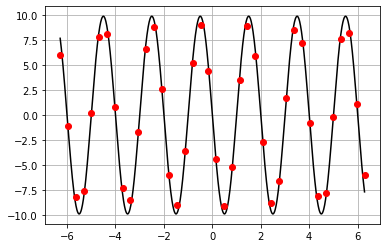

In [6]:
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, f_dubl_prime(x), 'k')
axes.plot(x_hat, f_dubl_prime_hat, 'ro')
#axes.set_xlim((x[0], x[-1]))
#axes.set_ylim((-1.1, 1.1))
axes.grid()

plt.show()

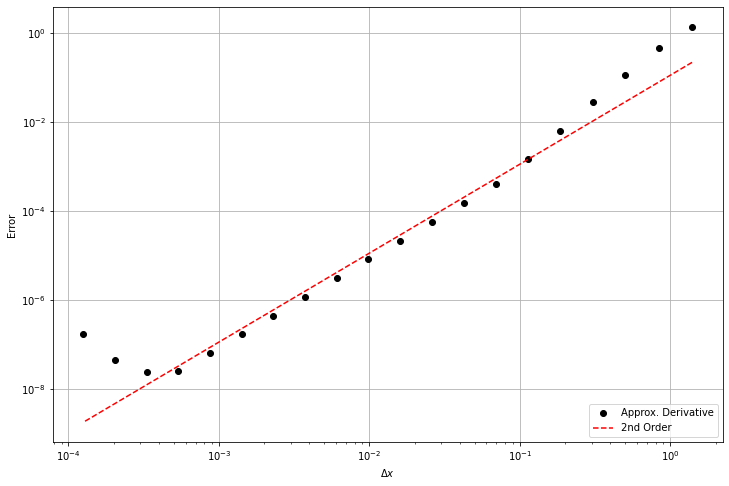

In [55]:
f = lambda x: numpy.sin(x)
f_dubl_prime = lambda x: -numpy.sin(x)

# Compute the error as a function of delta_x
delta_x = []
error = []
# for N in xrange(2, 101):
delta_x_range = numpy.geomspace(10,100000,num=20, dtype=int)
for N in delta_x_range:
    x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
    delta_x.append(x_hat[1] - x_hat[0])

    # Compute derivative
    f_dubl_prime_hat = numpy.empty(x_hat.shape)
    f_dubl_prime_hat[1:-1] = (f(x_hat[2:]) -2.0 * f(x_hat[1:-1]) + f(x_hat[:-2])) / (delta_x[-1]**2)

    # Use second-order differences for points at edge of domain
    f_dubl_prime_hat[0] = (2.0 * f(x_hat[0]) - 5.0 * f(x_hat[1]) + 4.0 * f(x_hat[2]) - f(x_hat[3])) / delta_x[-1]**2
    f_dubl_prime_hat[-1] = (2.0 * f(x_hat[-1]) - 5.0 * f(x_hat[-2]) + 4.0 * f(x_hat[-3]) - f(x_hat[-4])) / delta_x[-1]**2
    
    error.append(numpy.linalg.norm(numpy.abs(f_dubl_prime(x_hat) - f_dubl_prime_hat), ord=numpy.infty))
    
error = numpy.array(error)
delta_x = numpy.array(delta_x)
    
fig = plt.figure(figsize=(12,8))
axes = fig.add_subplot(1, 1, 1)
plt.xlabel('$\Delta x$')
plt.ylabel('Error')

# axes.plot(delta_x, error)
axes.loglog(delta_x, error, "ko", label="Approx. Derivative")
order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
#axes.loglog(delta_x, order_C(delta_x[5], error[5], 1.0) * delta_x**1.0, 'b--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[5], error[5], 2.0) * delta_x**2.0, 'r--', label="2nd Order")
axes.legend(loc=4)
axes.grid()

plt.show()

$$\text{float}\big(\frac{f(x_{n+1}) - 2 f(x_n) + f(x_{n-1})}{2 \Delta x^2}\big) + \mathcal{O}(\Delta x^2) \\
 \big(\frac{f(x_{n+1}) - 2 f(x_n) + f(x_{n-1})}{2 \Delta x^2}\big)(1 + \varepsilon) + \mathcal{O}(\Delta x^2)
$$